In [51]:
import pandas as pd

In [52]:
import gdown
url = 'https://drive.google.com/uc?export=download&id=1EYGudsvgwHA04DvHnR5C3NrkcumycH-M'
output= 'SMSSpamCollection.txt'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1EYGudsvgwHA04DvHnR5C3NrkcumycH-M
To: /content/SMSSpamCollection.txt
100%|██████████| 478k/478k [00:00<00:00, 105MB/s]


'SMSSpamCollection.txt'

In [53]:
uri = 'SMSSpamCollection.txt'
df = pd.read_table(uri, sep='\t', header=None, names=['label', 'sms_message'])

# printing out first 5 rows
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
# map the 'ham' value to 0 and the 'spam' value to 1.
df['label'] = df.label.map({'ham':0,'spam':1})
# Number of rows and column
df.shape

(5572, 2)

In [55]:
df

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [56]:
# Use from sklearn.model_selection import train_test_split to avoid seeing deprecation warning.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))



Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [57]:
y_test

1078    0
4028    0
958     0
4642    0
4674    0
       ..
3207    0
4655    0
1140    0
1793    1
1710    0
Name: label, Length: 1393, dtype: int64

In [58]:
# Data preprocessing with CountVectorizer()
# Import the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()
X_train

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
                              ...                        
905     We're all getting worried over here, derek and...
5192    Oh oh... Den muz change plan liao... Go back h...
3980    CERI U REBEL! SWEET DREAMZ ME LITTLE BUDDY!! C...
235     Text & meet someone sexy today. U can find a d...
5157                              K k:) sms chat with me.
Name: sms_message, Length: 4179, dtype: object

In [60]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [61]:
# Fit the training data
training_data = count_vector.fit_transform(X_train)
print(training_data[1000])
print(X_train[1000])
# stopped here

  (0, 6571)	1
  (0, 2320)	1
  (0, 3244)	1
  (0, 3221)	1
  (0, 3193)	1
  (0, 6096)	1
Aight will do, thanks again for comin out


In [62]:
type(training_data[1000])

scipy.sparse.csr.csr_matrix

In [63]:
training_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
training_data[1000].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [65]:
len(training_data[1000].toarray())

1

In [66]:
len(training_data[1000].toarray()[0])

7456

In [67]:
oneDocArray = training_data[1000].toarray()[0]
min(oneDocArray), max(oneDocArray)

(0, 1)

In [68]:
oneDocArray

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
oneDocArray = training_data[999].toarray()[0]
min(oneDocArray), max(oneDocArray)

(0, 2)

In [70]:
oneDocArray = training_data[1000].toarray()[0]
min(oneDocArray), max(oneDocArray)

(0, 1)

In [71]:
oneDocArray = training_data[1001].toarray()
training_data.shape
# min(oneDocArray), max(oneDocArray)

(4179, 7456)

In [72]:
X_train[1135]
len(training_data.toarray())

4179

In [73]:
len(X_train)

4179

In [74]:
from collections import Counter
s = """
Bloody hell, oh, bloody hell, cant believe you forgot my surname Mr . Ill give u a clue, its spanish and begins with m...  
"""
words = s.split()
print("words = \n", words)
Counter(words)


words = 
 ['Bloody', 'hell,', 'oh,', 'bloody', 'hell,', 'cant', 'believe', 'you', 'forgot', 'my', 'surname', 'Mr', '.', 'Ill', 'give', 'u', 'a', 'clue,', 'its', 'spanish', 'and', 'begins', 'with', 'm...']


Counter({'.': 1,
         'Bloody': 1,
         'Ill': 1,
         'Mr': 1,
         'a': 1,
         'and': 1,
         'begins': 1,
         'believe': 1,
         'bloody': 1,
         'cant': 1,
         'clue,': 1,
         'forgot': 1,
         'give': 1,
         'hell,': 2,
         'its': 1,
         'm...': 1,
         'my': 1,
         'oh,': 1,
         'spanish': 1,
         'surname': 1,
         'u': 1,
         'with': 1,
         'you': 1})

In [75]:
for i in range(0,len(training_data.toarray())):
    oneDocArray = training_data[i].toarray()[0]
    # min(oneDocArray)
    max_rep = max(oneDocArray)

    try:
        if max_rep > 5:
            # print("{} - {} repeats \n{} \n{}".format(i, max_rep, X_train[i], training_data[i]))
            print("{} - {} repeats \n{} \n{}".format(i, max_rep, X_train[i], count_vector.inverse_transform(training_data[i])))
    except KeyError as e:
        print("{} index not present in array".format(i))

    

53 - 8 repeats 
Wow. I never realized that you were so embarassed by your accomodations. I thought you liked it, since i was doing the best i could and you always seemed so happy about "the cave". I'm sorry I didn't and don't have more to give. I'm sorry i offered. I'm sorry your room was so embarassing. 
[array(['to', 'you', 'then', 'how', 'the', 'and', 'that', 'my', 'have',
       'it', 'can', 'when', 'so', 'this', 'know', 've', 'best', 'yes',
       'be', 'room', 'what', 'no', 'if', 'for', 'as', 'who', 'out',
       'feel', 'do', 'was', 'morning', 'keep', 'going', 'through',
       'never', 'intention', 'run', 'but', 'choose', 'rather', 'than',
       'clean', 'don', 'say', 'visitors', 'maybe', 'choice', 'wanted',
       'embarassed', 'once', 'friend', 'wants', 'drop', 'buy', 'happened',
       'tried', 'everything', 'else'], dtype='<U34')]
174 - 18 repeats 
Bloody hell, cant believe you forgot my surname Mr . Ill give u a clue, its spanish and begins with m...  
[array(['to', 'not'

In [76]:
# for, computing the max frequency over all
maxFrequency = 0
maxFreqIndex = 0
for doc, docIndex in zip(training_data, range(len(training_data.toarray()))):
    currentMax = max(doc.toarray()[0])
    if currentMax > maxFrequency:
        maxFrequency = currentMax
        maxFreqIndex = docIndex

maxFrequency, maxFreqIndex, X_train[maxFreqIndex]    

(18,
 174,
 'Bloody hell, cant believe you forgot my surname Mr . Ill give u a clue, its spanish and begins with m... ')

In [77]:

# Transform testing data
testing_data = count_vector.transform(X_test)


In [78]:
str(training_data[0])

'  (0, 509)\t1\n  (0, 3181)\t1\n  (0, 5193)\t1\n  (0, 4781)\t1\n  (0, 3971)\t1\n  (0, 5479)\t1\n  (0, 3880)\t1\n  (0, 1572)\t1\n  (0, 4987)\t1\n  (0, 2864)\t2\n  (0, 3170)\t1\n  (0, 7424)\t1\n  (0, 4983)\t1\n  (0, 264)\t1\n  (0, 1552)\t1\n  (0, 4375)\t1\n  (0, 4743)\t1\n  (0, 50)\t1\n  (0, 6656)\t1\n  (0, 6892)\t1\n  (0, 4662)\t1\n  (0, 4779)\t1\n  (0, 2022)\t1'

In [79]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [80]:
y_train[0]

0

In [81]:
# Implementing Naive Bayes using scikit-learn
from sklearn.naive_bayes import MultinomialNB
naiveb_ayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [82]:
# Prediciting the messages as spam or ham -- testing data
predictions = naive_bayes.predict(testing_data)

In [83]:
# print(testing_data)

**Confusion matrix simple example**

In [87]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

[[1203    5]
 [  11  174]]


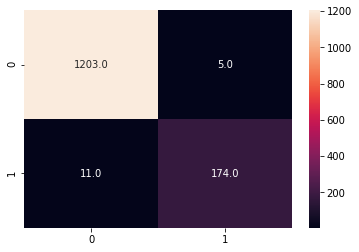

In [91]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt=".1f")

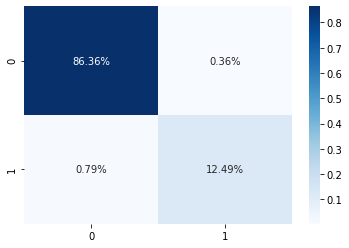

In [90]:
sns.heatmap(conf_matrix/np.sum(conf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

In [ ]:
predictions = naive_bayes.predict(training_data)
print('Accuracy score: {}'.format(accuracy_score(y_train, predictions)))
print('Precision score: {}'.format(precision_score(y_train, predictions)))
print('Recall score: {}'.format(recall_score(y_train, predictions)))
print('F1 score: {}'.format(f1_score(y_train, predictions)))

In [ ]:
# testing_data = count_vector.transform(["Best price"])
# predictions = naive_bayes.predict(testing_data)
# print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))

sample = ["Best price", "Free ticket for you", "india best 800", "lives matter", "Free entry in 2 a for you "]
testing_data = count_vector.transform(sample)
predictions = naive_bayes.predict(testing_data)
predictions

**Example** Count vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["John is a good boy. John watches boy's basketball"]

vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)

print(vectorizer.vocabulary_)

# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

In [ ]:
type(vector)

In [ ]:
print(vector)

In [ ]:
import numpy as np

# Initializing
vectorizer = CountVectorizer()
# Composing the core
corpus = [
  'word1 word2 word3',
  'word2 word3',
  'word1 word2 word1',
  'word4'
]
# Calculate
X = vectorizer.fit_transform(corpus)
 
# Thus, the following structure will be computed:
#        | word1 | word2 | word3 | word4
# text1 |   1    |    1   |   1    |   0
# text2 |   0    |    1   |   1    |   0
# text3 |   2    |    1   |   0    |   0
# text4 |   0    |    0   |   0    |   1

# Stopped here
 


In [ ]:
# To get the generated dictionary from CountVectorizer object, 
# we note that the order coincides with matrix
vectorizer.get_feature_names()  # ['word1', 'word2', 'word3', 'word4']

In [ ]:
# To get an index of a token in a dictionary, 
vectorizer.vocabulary_.get('word3') # returns 2

In [ ]:
# show matrix
X.toarray()

In [ ]:
# Now we can quickly compute the vector for a new document
vectorizer.transform(["word1 word4 word4"])  # result [[1 0 0 2]]

In [ ]:
# To find out the frequency of occurrence of each word:
matrix_freq = np.asarray(X.sum(axis=0)).ravel()
matrix_freq

In [ ]:
final_matrix = np.array([np.array(vectorizer.get_feature_names()), matrix_freq])
final_matrix